In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# EDA and preprocessing
# 1. Checking missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Describe the data 
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

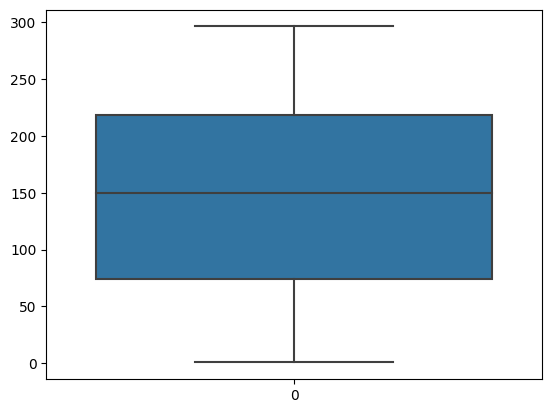

In [32]:
# 2. Check the outliers
sns.boxplot(df["TV"])

<AxesSubplot:>

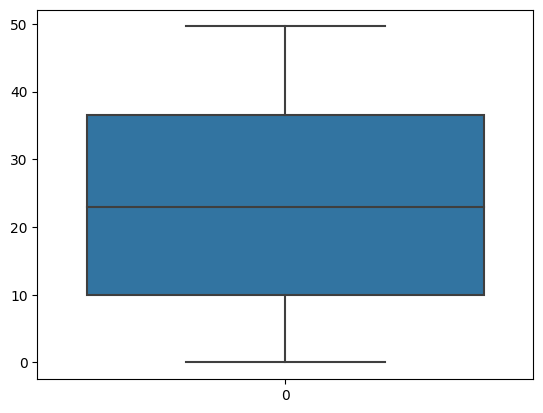

In [33]:
sns.boxplot(df["Radio"])

<AxesSubplot:>

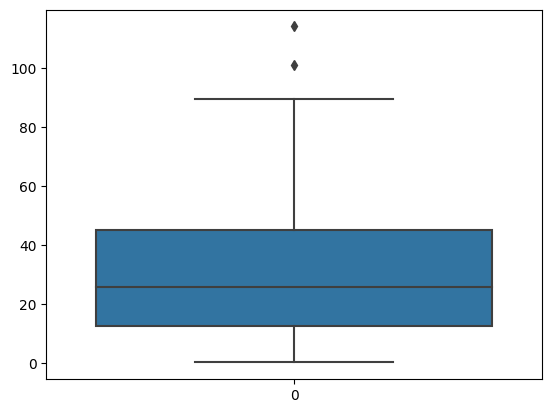

In [34]:
sns.boxplot(df['Newspaper'])

In [38]:
df[df["Newspaper"]>87]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
75,16.9,43.7,89.4,8.7
101,296.4,36.3,100.9,23.8


<AxesSubplot:>

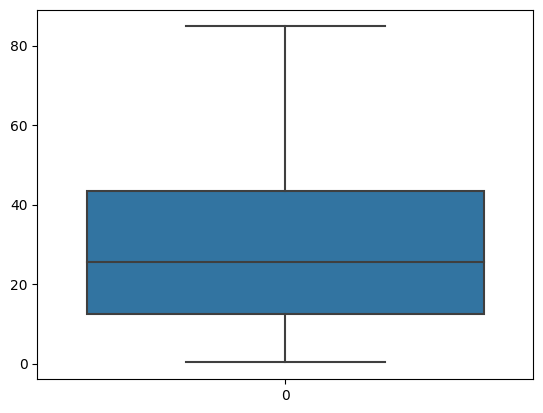

In [39]:
df.drop([16,75,101],inplace=True)
sns.boxplot(df['Newspaper'])

In [40]:
# Checking skewness of the data
from scipy.stats import skew

TV
-0.0881207129818191
Radio
0.12289280054689068
Newspaper
0.5986923466667885
Sales
-0.08914054647360968


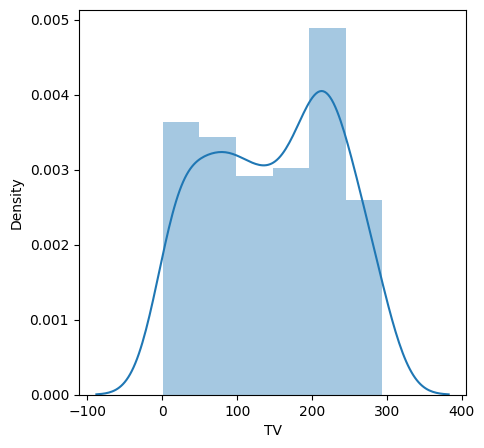

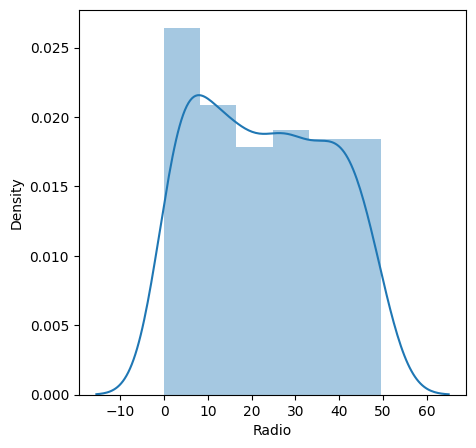

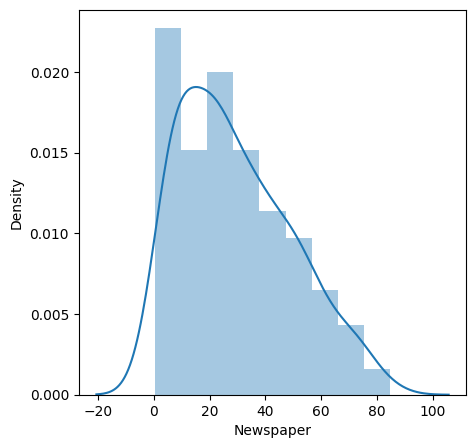

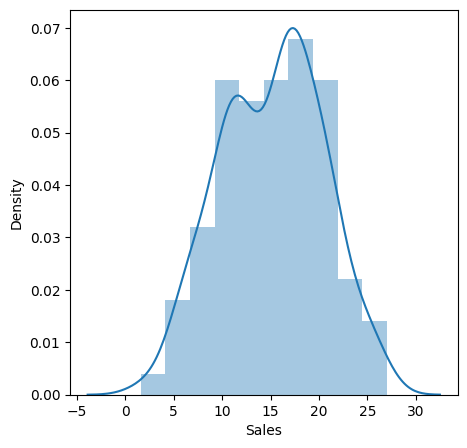

In [41]:
for i in df:
    print(i)
    print(skew(df[i]))
    
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    plt.show

In [45]:
for i in df:
    print(i)
    print(skew(df[i]))

TV
-0.0881207129818191
Radio
0.12289280054689068
Newspaper
0.5986923466667885
Sales
-0.08914054647360968


<AxesSubplot:>

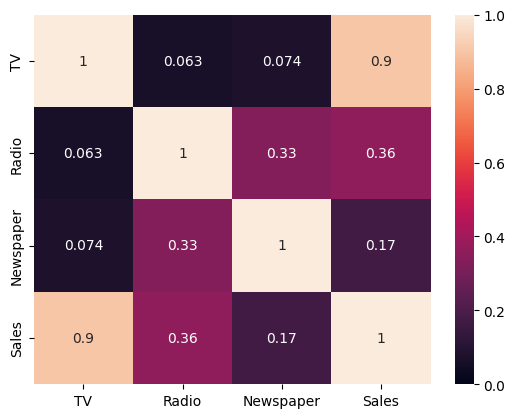

In [44]:
# checking correlation

sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

In [57]:
# Transform the skewed data into sqrt
df['Newspaper']=np.sqrt(df['Newspaper'])

In [60]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [61]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sales',axis=1), 
                                                    df['Sales'], 
                                                    test_size=0.3,
                                                    random_state=10)

In [66]:
x_scale=mms.fit_transform(X_train)
x_test_scale=mms.fit_transform(X_test)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm=LinearRegression()

In [69]:
lm.fit(x_scale,y_train)

LinearRegression()

In [70]:
print (lm.intercept_)
print (lm.coef_)

4.414758306752244
[15.76470442  4.96043927  1.02966982]


In [71]:
y_pred=lm.predict(x_test_scale)

In [73]:
new_df=X_test
new_df["Actual"]=y_test
new_df["Predicted"]=y_pred
new_df

,TV,Radio,Newspaper,Actual,Predicted
60,53.5,2.0,4.626013,8.1,7.799298
5,8.7,48.9,8.660254,7.2,10.586582
21,237.4,5.1,4.847680,17.5,18.539514
194,149.7,35.6,2.449490,17.3,16.342141
53,182.6,46.2,7.661593,21.2,20.003189
20,218.4,27.7,7.307530,18.0,20.100794
162,188.4,18.1,5.059644,19.9,17.118066
56,7.3,28.1,6.434283,5.5,8.087376
70,199.1,30.6,6.220932,18.3,19.152668
2,17.2,45.9,8.324662,12.0,10.715967


In [77]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(df['Sales'])-1)/(len(df['Sales'])-df.drop('Sales',axis=1).shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

R Square:  0.9010799325224513
Adjusted R Square:  0.8995423148932666
RMSE:  1.682571949942411


In [ ]:
# We can conclude here that the model we created has an efficiency of 
# around 90.1%
# Root mean squared error is 1.68